In [14]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_rm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [15]:
data

['t_n55          7.4946 ( 7.0267,  8.1949) ( 6.9882,  8.1366)  1.1484 (Jnode 106)\n',
 't_n56          7.3504 ( 6.9500,  8.0062) ( 6.8835,  7.9154)  1.0319 (Jnode 105)\n',
 't_n57          6.7226 ( 6.3879,  7.3199) ( 6.3529,  7.2516)  0.8987 (Jnode 104)\n',
 't_n58          5.5969 ( 5.3731,  6.0880) ( 5.3455,  5.9996)  0.6540 (Jnode 103)\n',
 't_n59          5.3634 ( 5.1592,  5.8361) ( 5.1513,  5.7429)  0.5916 (Jnode 102)\n',
 't_n60          5.0812 ( 4.8747,  5.5288) ( 4.8517,  5.4569)  0.6052 (Jnode 101)\n',
 't_n61          4.6615 ( 4.4484,  5.0794) ( 4.4174,  5.0098)  0.5925 (Jnode 100)\n',
 't_n62          2.1823 ( 1.9343,  2.4653) ( 1.9245,  2.4543)  0.5298 (Jnode 99)\n',
 't_n63          3.2897 ( 3.0619,  3.6114) ( 3.0414,  3.5820)  0.5406 (Jnode 98)\n',
 't_n64          2.3652 ( 2.1611,  2.6253) ( 2.1476,  2.6055)  0.4579 (Jnode 97)\n',
 't_n65          2.0588 ( 1.8693,  2.2953) ( 1.8615,  2.2844)  0.4229 (Jnode 96)\n',
 't_n66          1.6000 ( 1.4370,  1.7993) ( 1.4294,  1.78

In [16]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [17]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [18]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [19]:
posterior_mean_iqtree

[7.4946,
 7.3504,
 6.7226,
 5.5969,
 5.3634,
 5.0812,
 4.6615,
 2.1823,
 3.2897,
 2.3652,
 2.0588,
 1.6,
 1.0963,
 0.7345,
 0.2972,
 2.4848,
 5.1535,
 4.5839,
 4.6353,
 3.3374,
 2.9246,
 2.6732,
 5.0557,
 4.7477,
 4.532,
 4.255,
 3.8844,
 3.7263,
 3.2325,
 2.9293,
 2.6564,
 2.0206,
 1.7958,
 3.3142,
 2.6443,
 4.9114,
 1.2349,
 4.754,
 4.4,
 3.8986,
 3.5642,
 2.6217,
 2.9135,
 3.7483,
 3.533,
 3.1492,
 2.5468,
 3.1951,
 6.0034,
 4.524,
 2.8691,
 2.2994,
 5.2698]

In [20]:
lower_ci_iqtree

[7.0267,
 6.95,
 6.3879,
 5.3731,
 5.1592,
 4.8747,
 4.4484,
 1.9343,
 3.0619,
 2.1611,
 1.8693,
 1.437,
 0.971,
 0.643,
 0.2508,
 2.2661,
 4.9404,
 4.3391,
 4.418,
 3.0895,
 2.6765,
 2.383,
 4.8357,
 4.5258,
 4.3092,
 4.0347,
 3.6725,
 3.5128,
 3.0315,
 2.735,
 2.4729,
 1.8577,
 1.6425,
 3.1024,
 2.4398,
 4.689,
 1.0147,
 4.535,
 4.1842,
 3.6872,
 3.3569,
 2.4125,
 2.7088,
 3.536,
 3.3232,
 2.936,
 2.3335,
 2.9412,
 5.6883,
 4.186,
 2.5407,
 1.952,
 4.6906]

In [21]:
upper_ci_iqtree

[8.1949,
 8.0062,
 7.3199,
 6.088,
 5.8361,
 5.5288,
 5.0794,
 2.4653,
 3.6114,
 2.6253,
 2.2953,
 1.7993,
 1.2429,
 0.8413,
 0.3513,
 2.7573,
 5.608,
 5.0043,
 5.0524,
 3.6775,
 3.2433,
 3.0097,
 5.5054,
 5.1723,
 4.941,
 4.6407,
 4.24,
 4.0715,
 3.5425,
 3.2167,
 2.9222,
 2.2371,
 1.9953,
 3.6277,
 2.9179,
 5.3498,
 1.4826,
 5.18,
 4.8,
 4.2596,
 3.8969,
 2.8946,
 3.202,
 4.096,
 3.8648,
 3.4607,
 2.823,
 3.5307,
 6.5452,
 4.9839,
 3.2499,
 2.6722,
 6.0198]

In [22]:
file_LG = open("LG_rm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

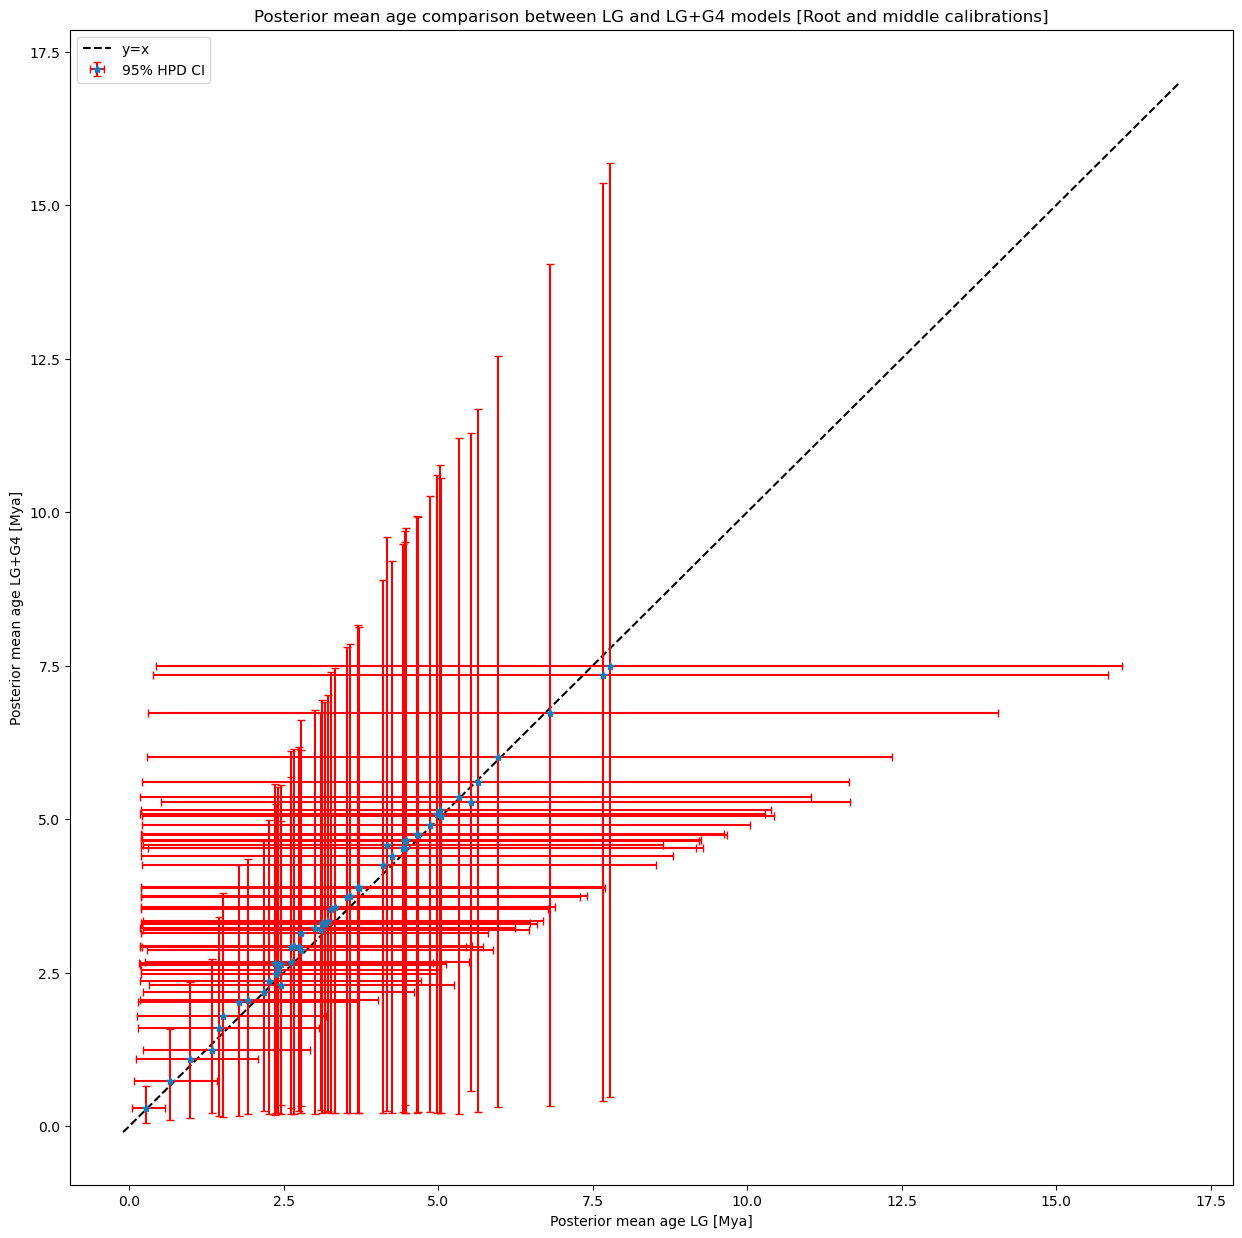

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Root and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_rm.png')

In [24]:
posterior_mean_baseml

[7.7849,
 7.6699,
 6.8023,
 5.6364,
 5.3342,
 4.9732,
 4.4709,
 2.1818,
 3.1726,
 2.2545,
 1.915,
 1.4557,
 0.985,
 0.6623,
 0.2666,
 2.3801,
 5.0243,
 4.1661,
 4.4558,
 3.2081,
 2.738,
 2.6102,
 5.0426,
 4.6715,
 4.4281,
 4.1093,
 3.7154,
 3.5173,
 3.0049,
 2.6629,
 2.3555,
 1.7708,
 1.5151,
 3.121,
 2.4551,
 4.8584,
 1.3449,
 4.6474,
 4.25,
 3.6941,
 3.3207,
 2.4083,
 2.6172,
 3.5711,
 3.2618,
 2.7861,
 2.412,
 3.1008,
 5.9664,
 4.4581,
 2.7833,
 2.4609,
 5.5276]

In [25]:
posterior_mean_iqtree

[7.4946,
 7.3504,
 6.7226,
 5.5969,
 5.3634,
 5.0812,
 4.6615,
 2.1823,
 3.2897,
 2.3652,
 2.0588,
 1.6,
 1.0963,
 0.7345,
 0.2972,
 2.4848,
 5.1535,
 4.5839,
 4.6353,
 3.3374,
 2.9246,
 2.6732,
 5.0557,
 4.7477,
 4.532,
 4.255,
 3.8844,
 3.7263,
 3.2325,
 2.9293,
 2.6564,
 2.0206,
 1.7958,
 3.3142,
 2.6443,
 4.9114,
 1.2349,
 4.754,
 4.4,
 3.8986,
 3.5642,
 2.6217,
 2.9135,
 3.7483,
 3.533,
 3.1492,
 2.5468,
 3.1951,
 6.0034,
 4.524,
 2.8691,
 2.2994,
 5.2698]

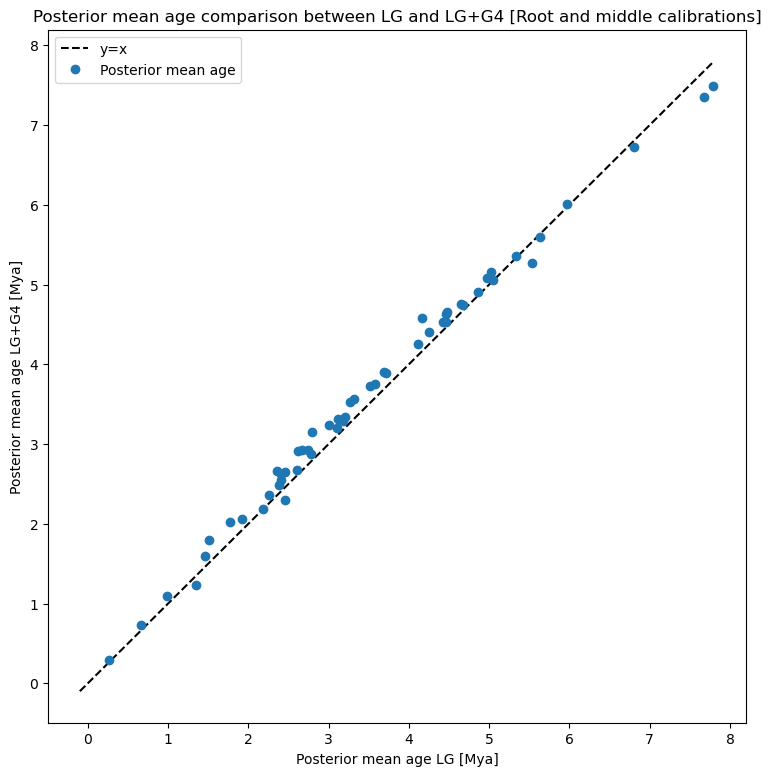

In [26]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,7.8], 
        [-0.1, 7.8], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Root and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_rm_scatter.png')